IMPORTING RELEVANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


LOADING THE DATA

In [2]:
stock_data = pd.read_csv('Amazon_Stock_Price.csv')

DATA PREPROCESSING

In [4]:
# Extract closing prices
closing_prices = stock_data['Close'].values.reshape(-1, 1)

In [5]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(closing_prices)

In [11]:
# Create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Number of time steps to look back
X, y = create_sequences(scaled_data, seq_length)

MODEL ARCHITECTURE

In [12]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

2024-07-24 13:30:22.963428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-24 13:30:22.964495: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-24 13:30:22.965234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

TRAINING THE MODEL 

In [8]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/50


2024-07-24 13:24:02.416332: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-07-24 13:24:02.674831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-24 13:24:02.676888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-24 13:24:02.679365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

134/135 [============================>.] - ETA: 0s - loss: 1.7708e-04

2024-07-24 13:24:09.564498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-24 13:24:09.565143: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-24 13:24:09.565863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

135/135 [==============================] - 8s 40ms/step - loss: 1.7787e-04 - val_loss: 0.0074
Epoch 2/50
135/135 [==============================] - 5s 38ms/step - loss: 0.0010 - val_loss: 0.0323
Epoch 3/50
135/135 [==============================] - 5s 38ms/step - loss: 0.0011 - val_loss: 0.0279
Epoch 4/50
135/135 [==============================] - 5s 37ms/step - loss: 9.7482e-04 - val_loss: 0.0240
Epoch 5/50
135/135 [==============================] - 5s 37ms/step - loss: 9.6517e-04 - val_loss: 0.0228
Epoch 6/50
135/135 [==============================] - 5s 37ms/step - loss: 0.0010 - val_loss: 0.0178
Epoch 7/50
135/135 [==============================] - 5s 39ms/step - loss: 0.0011 - val_loss: 0.0047
Epoch 8/50
135/135 [==============================] - 5s 38ms/step - loss: 0.0015 - val_loss: 0.0035
Epoch 9/50
135/135 [==============================] - 5s 38ms/step - loss: 0.0015 - val_loss: 4.4459e-04
Epoch 10/50
135/135 [==============================] - 5s 37ms/step - loss: 9.5051e-04

MAKING PREDICTIONS

In [9]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

2024-07-24 13:29:29.228594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-24 13:29:29.229659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-24 13:29:29.230322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

38/38 [==============================] - 1s 8ms/step


MODEL EVALUATION

Mean Squared Error: 521.7324306772398
Mean Absolute Error: 21.109838960166766
Root Mean Squared Error: 22.84146297147448


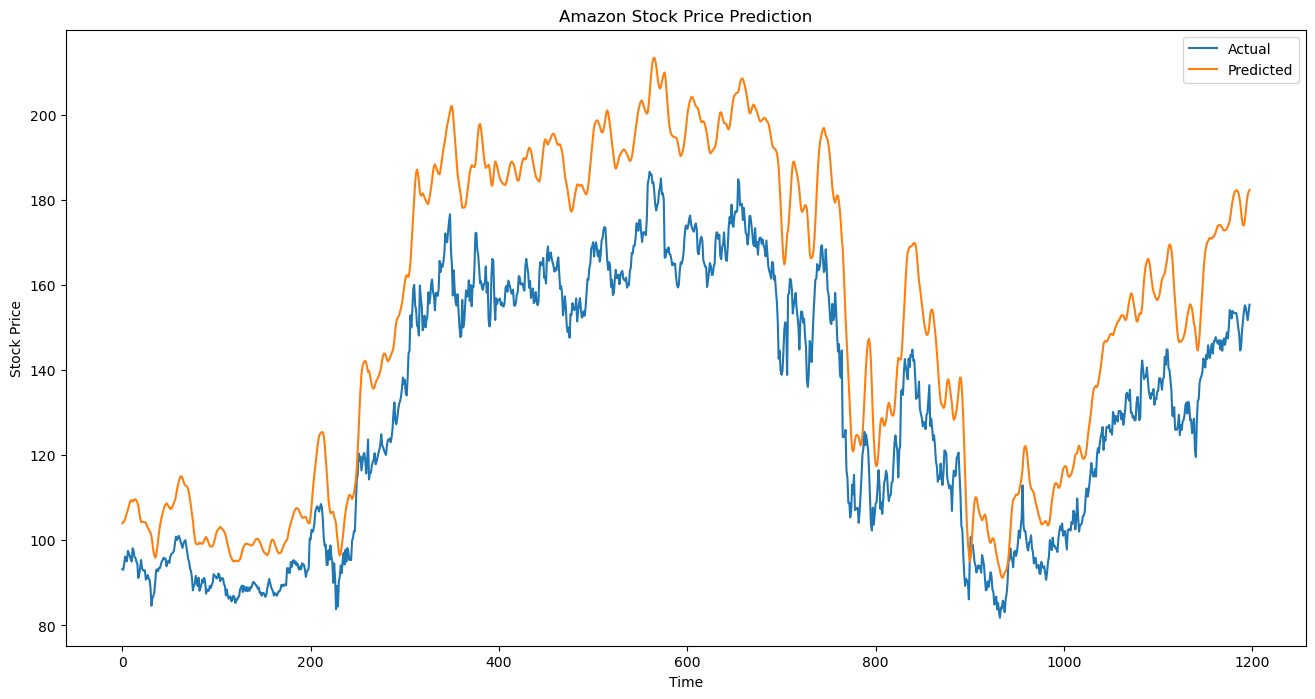

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate error metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()